In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from faker import Faker

# 显示中文标签
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# XX市公安治安防控项目案例

**项目简介**：本项目建设是XX市公安局站在贯彻理解国家整体安全观的历史新高度，深刻认识大数据、人工智能等信息化产业发展的趋势规律和重大作用，准确把握新时代公安工作面临的新形势、新任务、新要求，紧紧抓住信息科技前沿技术加速发展的新机遇，持续推进公安系统改革和警务模式创新的战略选择和重要举措。着力解决防控体系建设工作碎片化、数据孤岛化等问题，通过利旧或新建物联感知设施、设备，推进智能感知、智能采集等信息化科技手段应用，建设社会治安防控业务应用系统，实现重点领域、重点区域信息化管理、智能化应用，推动警务模式和警务机制转型升级。

**项目总览**：包含公交地铁防控系统、街面巡防管控系统、安防小区管控系统、娱乐场所治安管控系统、公安检查站管控系统、**社会基础信息管理系统**等等

在这里，我们主要演示社会基础信息管理系统。

# 社会基础信息管理系统

社会基础信息管理系统主要目的是全面摸清辖区实有人口、实有房屋、实有单位的基本情况，建立完整、准确的基础信息数据库。这有助于公安加强基础信息建设，有效服务和支撑反恐防暴、侦查破案、行政管理、服务群众等各项公安工作。

社会基础信息管理系统主要分为3个子项目：
* **实有人口分析**：实现对人口从多维度进行展现，范围包含人口概览、人员来源占比、高龄老人数据分析、重点人员等维度。


* 实有房屋分析：实现对房屋从多维度进行展现，范围包含自住房屋、出租房屋、空置房屋、单位房屋等。


* 实有单位分析：实现对单位信息从多维度进行展现，范围包含企业单位、事业单位、机关单位、医院、宾馆、领事馆等等。

接下来我们以实有人口分析举例说明：

## 实有人口分析

实现对人口从多维度进行展现，范围包含人口概览、人员来源占比、高龄老人数据分析、重点人员等维度。

* 总人口概览：从户籍人员、外来人员两个维度分析所占总人口的百分比等信息。
* 外来人员: 统计展现外来人员前五名地区等信息。
* 年龄分布：实现对辖区人口年龄信息进行分析。
* 重点人员：针对某个重点人员判断是否属于涉恐人员、涉稳人员、重大刑事犯罪前科人员、涉毒人员、在逃人员、肇事肇祸精神病人、重点上访人员等等。

### 1 构造数据

我们根据业务理解构造一份实有人口的数据，数据字段包含：姓名、性别、身份证、生日、户籍地、公司名、职位、电话、现住址。

In [2]:
# 构造数据
fake = Faker(locale='zh_CN')

temp = []
for i in range(100000):
    res = fake.profile(fields=['name', 'sex', 'ssn',
                               'birthdate', 'company', 'job'])
    res['电话'] = fake.phone_number()
    res['现住址'] = '武汉市{}'.format(fake.street_address())
    res['户籍城市'] = fake.city_name() 
    temp.append(res)

data = pd.DataFrame(temp)
data.rename(columns={'job': '职位','name':'姓名', 'sex': '性别', 'ssn': '身份证',
            'birthdate': '生日', 'company': '公司'},inplace=True)

# 去重复
data.drop_duplicates(subset=['身份证'],keep='first',inplace=True)
data

,职位,公司,身份证,姓名,性别,生日,电话,现住址,户籍城市
0,工程/设备工程师,和泰网络有限公司,150801198611185630,孙婷,M,1981-08-08,14791212486,武汉市沈街V座,大冶
1,税务经理/税务主管,彩虹科技有限公司,320925197103080254,高欣,F,1920-04-12,18273172798,武汉市冉街y座,合肥
2,IT-管理,网新恒天科技有限公司,230822198810074900,邱俊,M,1953-03-24,13660443515,武汉市庞街x座,成都
3,美容培训师/导师,海创信息有限公司,150501197606229343,徐静,M,1954-04-02,18631561562,武汉市深圳街e座,上海
4,管道/暖通,菊风公司网络有限公司,522626194112286161,周婷,F,1966-11-03,15020916842,武汉市福州路X座,辽阳
...,...,...,...,...,...,...,...,...,...
99995,卖场经理/店长,易动力信息有限公司,469007193801244761,李军,F,1944-11-06,14720895737,武汉市王街t座,南京
99996,销售行政及商务,戴硕电子信息有限公司,350128199404120168,辛红霞,F,1915-11-21,18855185042,武汉市黄路F座,福州
99997,人事主管,恩悌科技有限公司,654021199506134709,苏佳,F,1938-02-04,18846045048,武汉市荆门街o座,通辽
99998,物业维修员,惠派国际公司传媒有限公司,150501196504208010,刘东,M,2011-10-17,13636299771,武汉市哈尔滨路k座,石家庄


然后我们在构建一张表来存储重点人员，字段包含是否属于涉恐人员、涉稳人员、重大刑事犯罪前科人员、涉毒人员、在逃人员、肇事肇祸精神病人、重点上访人员等等，在这里就简要以1和0分别代表是和否。

In [3]:
# 构建一张重点人员表
important_people = []

# 随机抽取上面的人作为重点人员
for i in range(100):
    res = {}
    res['身份证'] = np.random.choice(data['身份证'])
    res['涉恐人员'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['涉稳人员'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['重大刑事犯罪前科人员'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['涉毒人员'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['在逃人员'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['肇事肇祸精神病人'] = np.random.choice([0,1],p=[0.9, 0.1])
    res['重点上访人员'] = np.random.choice([0,1],p=[0.1, 0.9])
    
    # 若7类重点人员都是0，那么就把重点上访人员设为1
    count = 0
    for value in res.values():
        if value == 1:
            break
        else:
            count += 1
            
    if count == 7:
        res['重点上访人员'] = 1
    
    important_people.append(res)

important_people_data = pd.DataFrame(important_people)
important_people_data.drop_duplicates(subset=['身份证'],keep='first',inplace=True)
important_people_data

,身份证,涉恐人员,涉稳人员,重大刑事犯罪前科人员,涉毒人员,在逃人员,肇事肇祸精神病人,重点上访人员
0,450901200111208775,0,0,0,0,0,0,1
1,320301195403123540,0,0,0,0,0,0,1
2,350300197302263681,0,0,0,0,0,0,1
3,231226198803035595,0,0,0,0,0,1,0
4,370400197403222204,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
95,13072819470104456X,0,1,1,0,1,0,1
96,371700195909300466,0,0,0,0,0,0,1
97,140800198112109467,0,0,0,0,0,0,1
98,540125197609050535,0,0,0,0,0,1,1


### 2 数据分析

假如我们上面构成的数据是北京某辖区的实有人口数据，现在想要对该辖区的实有人口从多维度进行分析，包含总人口概览、外来人员、户籍属性分类统计、年龄分布、重点人员。

#### 2.1 总人口概览
从户籍人员、外来人员两个维度分析所占总人口的百分比等信息。

In [4]:
# 显示数据
data.head()

,职位,公司,身份证,姓名,性别,生日,电话,现住址,户籍城市
0,工程/设备工程师,和泰网络有限公司,150801198611185630,孙婷,M,1981-08-08,14791212486,武汉市沈街V座,大冶
1,税务经理/税务主管,彩虹科技有限公司,320925197103080254,高欣,F,1920-04-12,18273172798,武汉市冉街y座,合肥
2,IT-管理,网新恒天科技有限公司,230822198810074900,邱俊,M,1953-03-24,13660443515,武汉市庞街x座,成都
3,美容培训师/导师,海创信息有限公司,150501197606229343,徐静,M,1954-04-02,18631561562,武汉市深圳街e座,上海
4,管道/暖通,菊风公司网络有限公司,522626194112286161,周婷,F,1966-11-03,15020916842,武汉市福州路X座,辽阳


In [5]:
# 判断是否为户籍人员，1为是，0为否
data['户籍人员'] = np.where(data['户籍城市'] == '武汉', 1, 0)
data.head()

,职位,公司,身份证,姓名,性别,生日,电话,现住址,户籍城市,户籍人员
0,工程/设备工程师,和泰网络有限公司,150801198611185630,孙婷,M,1981-08-08,14791212486,武汉市沈街V座,大冶,0
1,税务经理/税务主管,彩虹科技有限公司,320925197103080254,高欣,F,1920-04-12,18273172798,武汉市冉街y座,合肥,0
2,IT-管理,网新恒天科技有限公司,230822198810074900,邱俊,M,1953-03-24,13660443515,武汉市庞街x座,成都,0
3,美容培训师/导师,海创信息有限公司,150501197606229343,徐静,M,1954-04-02,18631561562,武汉市深圳街e座,上海,0
4,管道/暖通,菊风公司网络有限公司,522626194112286161,周婷,F,1966-11-03,15020916842,武汉市福州路X座,辽阳,0


In [6]:
# 查看数量
count = data['户籍人员'].value_counts()
count

0    98548
1     1452
Name: 户籍人员, dtype: int64

Text(0.5, 1.0, '总人口概览')

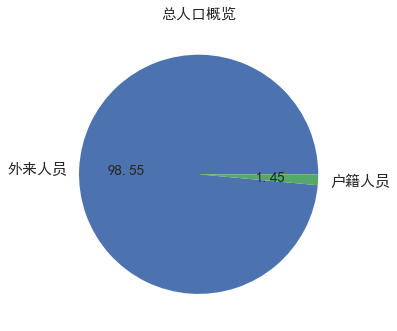

In [7]:
# 画出饼图
plt.pie(count,labels=['外来人员','户籍人员'],autopct='%.2f',textprops={'fontsize':15})
plt.title('总人口概览',fontsize=15)

我们可以得到信息，该辖区的外来人员占比十分高，几乎全部为外来人员。

#### 2.2 外来人员

统计展现外来人员前五名地区等信息。

In [8]:
# 得出外来人员的前5名
migrants = data[data['户籍人员']==0]
migrants['户籍城市'].value_counts()[:5]

太原     2913
哈尔滨    2871
沈阳     2816
合山     1526
济南     1487
Name: 户籍城市, dtype: int64

#### 2.3 年龄分布

实现对辖区人口年龄信息进行分析,可以分析老年化的程度或者青壮年的百分比等等。

In [9]:
# 得到今年的时间
today = datetime.datetime.today().year

# 算出年龄
data['生日'] = pd.to_datetime(data['生日'])
data['年龄'] = today - data['生日'].dt.year
data.head()

,职位,公司,身份证,姓名,性别,生日,电话,现住址,户籍城市,户籍人员,年龄
0,工程/设备工程师,和泰网络有限公司,150801198611185630,孙婷,M,1981-08-08,14791212486,武汉市沈街V座,大冶,0,41
1,税务经理/税务主管,彩虹科技有限公司,320925197103080254,高欣,F,1920-04-12,18273172798,武汉市冉街y座,合肥,0,102
2,IT-管理,网新恒天科技有限公司,230822198810074900,邱俊,M,1953-03-24,13660443515,武汉市庞街x座,成都,0,69
3,美容培训师/导师,海创信息有限公司,150501197606229343,徐静,M,1954-04-02,18631561562,武汉市深圳街e座,上海,0,68
4,管道/暖通,菊风公司网络有限公司,522626194112286161,周婷,F,1966-11-03,15020916842,武汉市福州路X座,辽阳,0,56


In [10]:
# 对年龄进行分组
bins = [0,14,59,120]
p_counts = pd.cut(data['年龄'],bins)

# 查看每个区间变量的个数
p_counts.value_counts()

(59, 120]    48924
(14, 59]     38721
(0, 14]      12087
Name: 年龄, dtype: int64

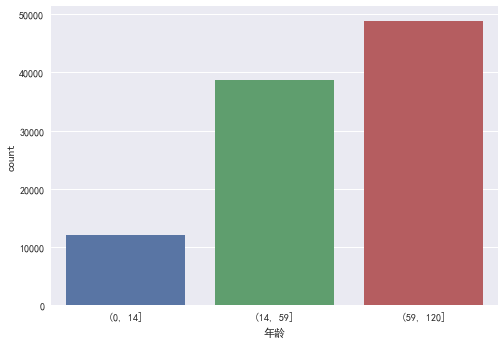

In [11]:
sns.countplot(x=p_counts.index,data=p_counts)

#### 2.4 重点人员

针对某个重点人员判断是否属于涉恐人员、涉稳人员、重大刑事犯罪前科人员、涉毒人员、在逃人员、肇事肇祸精神病人、重点上访人员等等。在实际业务中，这些信息因为涉密并隶属于不同部门，所以会储存在不同的表中，而我们需要做的便是数据聚合，并整理出一张重点人员表。

In [12]:
# 经过数据聚合形成的重点人员表
important_people_data

,身份证,涉恐人员,涉稳人员,重大刑事犯罪前科人员,涉毒人员,在逃人员,肇事肇祸精神病人,重点上访人员
0,450901200111208775,0,0,0,0,0,0,1
1,320301195403123540,0,0,0,0,0,0,1
2,350300197302263681,0,0,0,0,0,0,1
3,231226198803035595,0,0,0,0,0,1,0
4,370400197403222204,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
95,13072819470104456X,0,1,1,0,1,0,1
96,371700195909300466,0,0,0,0,0,0,1
97,140800198112109467,0,0,0,0,0,0,1
98,540125197609050535,0,0,0,0,0,1,1


假设公安排查出某人的形迹可疑，上去询问身份证号，在数据库里检索，就可排查出是否为重点人员。

In [13]:
# 筛选出嫌疑人信息
people = ['620103198510315587','410702195910154464']
important_people_data[important_people_data['身份证'].isin(people)]

,身份证,涉恐人员,涉稳人员,重大刑事犯罪前科人员,涉毒人员,在逃人员,肇事肇祸精神病人,重点上访人员
